# Imports Needed

In [1]:
import numpy as np
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

# Data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Prepare Data

In [4]:
# Normalize data

x_train = x_train / 255.0
x_test = x_test / 255.0

#Reshape Data, from 28x28 to 784x1
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)


# Creating Model - CNN

In [5]:
model = Sequential()

model.add(Dense(units=128, input_shape=[784,], activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

c:\Users\User\Desktop\DrawAndPredict\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

# Training

In [6]:
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)


Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7010 - loss: 1.0161
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9265 - loss: 0.2507
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9487 - loss: 0.1780
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9590 - loss: 0.1376
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9665 - loss: 0.1171
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9715 - loss: 0.0969
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9758 - loss: 0.0806
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9782 - loss: 0.0716
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9812 - loss: 0.0621
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9833 - loss: 0.0558


# Evaluating

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss, "Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.9725 - loss: 0.0872
Test Loss: 0.07415909320116043 Test Accuracy: 0.9769999980926514


In [8]:
y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)

print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step
[[2.0657556e-06 5.9379072e-06 7.2866142e-06 ... 9.9995899e-01
  5.8913685e-07 8.0492055e-07]
 [1.6001145e-08 8.4306463e-05 9.9991405e-01 ... 2.7059899e-08
  2.5162956e-07 6.7603825e-11]
 [3.9558031e-06 9.9872166e-01 1.4503871e-04 ... 5.9815240e-04
  1.7909227e-04 7.3392598e-06]
 ...
 [1.4427984e-10 3.9725871e-09 2.2897613e-09 ... 1.9609095e-06
  8.1673039e-07 7.6795768e-06]
 [3.3311515e-08 1.7532832e-07 1.2343478e-09 ... 2.8241207e-08
  5.7211470e-05 1.0869945e-08]
 [7.7816239e-08 2.6089519e-10 1.9303816e-09 ... 1.1515210e-13
  2.0620997e-10 2.1612137e-11]]
[7 2 1 ... 4 5 6]


# Testing With Python Program image

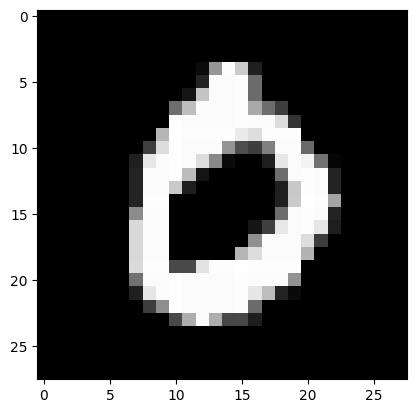

In [27]:
plt.imshow(x_test[3].reshape(28, 28), cmap='gray')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[9]


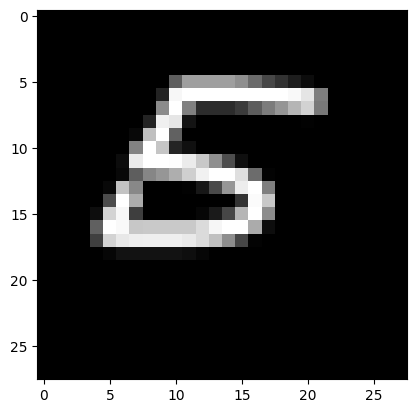

In [28]:
from PIL import Image

img = Image.open('drawing.png')
img = img.convert('L')  
img = img.resize((28, 28))  
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, -1)  
prediction = model.predict(img_array, batch_size=None, verbose="auto", steps=None, callbacks=None)
print(np.argmax(prediction, axis=1))
plt.imshow(img_array.reshape(28, 28), cmap='gray')

